# Analysis of model attached to dataset (ds_model)

## Full ds_model evaluation

With the full training dataset and further data augmentation to reach 200 images for each class ([https://www.kaggle.com/datasets/gpiosenka/100-bird-species](https://www.kaggle.com/datasets/gpiosenka/100-bird-species)), the model attached to the dataset (ds_model) achieves an impressive ~99% F1-score on the test dataset as shown below.

In [1]:
import tensorflow as tf
import os


RAW_IMAGE_HEIGHT = 224
RAW_IMAGE_WIDTH = 224
RAW_IMAGE_CHANNELS = 3

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
BATCH_SIZE = 512


dataset_test = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATA_DIR, 'test'),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    image_size=(RAW_IMAGE_HEIGHT, RAW_IMAGE_WIDTH),
    crop_to_aspect_ratio=True
)

ds_model = tf.keras.models.load_model(
    os.path.join('data', 'EfficientNetB0-525-(224 X 224)- 98.97.h5'),
    custom_objects={
        'F1_score': tf.keras.metrics.F1Score(average='weighted', threshold=None, name='f1_score', dtype=None)
    }
)
ds_model.trainable = False
ds_model.evaluate(dataset_test)

2023-10-24 15:39:05.068523: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 15:39:05.128219: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 15:39:05.128266: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 15:39:05.128302: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 15:39:05.138446: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 15:39:06.375980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

Found 2625 files belonging to 525 classes.
6/6 [==============================] - 40s 5s/step - loss: 0.2549 - accuracy: 0.9897 - F1_score: 0.9913


[0.2549077272415161, 0.9897142648696899, 0.9912918210029602]

## ds_model with less training data (ds_model_ltd)

ds_model and the models trained in `optim.py` are both based on EfficientNetB0:

In [2]:
effnet = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(RAW_IMAGE_HEIGHT, RAW_IMAGE_WIDTH, RAW_IMAGE_CHANNELS),
    include_top=False,
    weights='imagenet',
    pooling='max'
)
effnet.trainable = False
effnet.summary()

16705208/16705208 [==============================] - 10s 1us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Resca

                                                                                                  
 block2a_se_excite (Multipl  (None, 56, 56, 96)           0         ['block2a_activation[0][0]',  
 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 56, 56, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 56, 56, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_e

 block3a_se_excite (Multipl  (None, 28, 28, 144)          0         ['block3a_activation[0][0]',  
 y)                                                                  'block3a_se_expand[0][0]']   
                                                                                                  
 block3a_project_conv (Conv  (None, 28, 28, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 28, 28, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 28, 28, 240)          9600      ['block3a_project_bn[0][0]']  
 D)       

 y)                                                                  'block4a_se_expand[0][0]']   
                                                                                                  
 block4a_project_conv (Conv  (None, 14, 14, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block4c_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4c_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 14, 14, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 14, 14, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4c_add[0][0]']         
 D)       

 block5b_drop (Dropout)      (None, 14, 14, 112)          0         ['block5b_project_bn[0][0]']  
                                                                                                  
 block5b_add (Add)           (None, 14, 14, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
          

                                                                                                  
 block6a_project_bn (BatchN  (None, 7, 7, 192)            768       ['block6a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_e

 block6c_drop (Dropout)      (None, 7, 7, 192)            0         ['block6c_project_bn[0][0]']  
                                                                                                  
 block6c_add (Add)           (None, 7, 7, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
          

                                                                                                  
 top_conv (Conv2D)           (None, 7, 7, 1280)           409600    ['block7a_project_bn[0][0]']  
                                                                                                  
 top_bn (BatchNormalization  (None, 7, 7, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 max_pool (GlobalMaxPooling  (None, 1280)                 0         ['top_activation[0][0]']      
 2D)      

We can retrain the ds_model with the same training data that the models in `optim.py` were trained with by freezing the layers common to all models to see how this larger model fairs with less data (25 images per class). This leaves about half of the parameters pretrained from EfficientNetB0 and another half that need to be trained.

In [3]:
effnet_layer_names = {layer.name for layer in effnet.layers}

ds_model_ltd = tf.keras.models.load_model(
    os.path.join('data', 'EfficientNetB0-525-(224 X 224)- 98.97.h5'),
    custom_objects={
        'F1_score': tf.keras.metrics.F1Score(average='weighted', threshold=None, name='f1_score', dtype=None)
    }
)

for layer in ds_model_ltd.layers:
    if layer.name in effnet_layer_names:
        layer.trainable = False
    else:
        if hasattr(layer, 'trainable_weights'):
            for w in layer.trainable_weights:
                w.assign(tf.keras.initializers.he_normal()(w.shape))

ds_model_ltd.compile(
    optimizer=tf.keras.optimizers.AdamW(0.0001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.F1Score(
            average='weighted', threshold=None, name='f1_score', dtype=None
        )
    ]
)
ds_model_ltd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['normalization[0][0]']   

                                                                                                  
 block3b_project_conv (Conv  (None, 28, 28, 48)           9216      ['block3b_expand_activation[0]
 2D)                                                                [0]']                         
                                                                                                  
 block3b_project_bn (BatchN  (None, 28, 28, 48)           192       ['block3b_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_add (Add)           (None, 28, 28, 48)           0         ['block3b_project_bn[0][0]',  
                                                                     'block3a_project_bn[0][0]']  
                                                                                                  
 block4a_e

                                                                                                  
 block4b_add (Add)           (None, 14, 14, 96)           0         ['block4b_project_bn[0][0]',  
                                                                     'block4a_project_bn[0][0]']  
                                                                                                  
 block4c_expand_conv (Conv2  (None, 14, 14, 384)          36864     ['block4b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, 14, 14, 384)          1536      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_e

                                                                                                  
 block5b_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5b_expand_activation   (None, 14, 14, 672)          0         ['block5b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5b_dwconv2 (Depthwise  (None, 14, 14, 672)          6048      ['block5b_expand_activation[0]
 Conv2D)                                                            [0]']                         
                                                                                                  
 block5b_b

                                                                                                  
 block5d_expand_activation   (None, 14, 14, 672)          0         ['block5d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5d_dwconv2 (Depthwise  (None, 14, 14, 672)          6048      ['block5d_expand_activation[0]
 Conv2D)                                                            [0]']                         
                                                                                                  
 block5d_bn (BatchNormaliza  (None, 14, 14, 672)          2688      ['block5d_dwconv2[0][0]']     
 tion)                                                                                            
                                                                                                  
 block5d_a

                                                                                                  
 block6a_dwconv2 (Depthwise  (None, 7, 7, 672)            6048      ['block6a_expand_activation[0]
 Conv2D)                                                            [0]']                         
                                                                                                  
 block6a_bn (BatchNormaliza  (None, 7, 7, 672)            2688      ['block6a_dwconv2[0][0]']     
 tion)                                                                                            
                                                                                                  
 block6a_activation (Activa  (None, 7, 7, 672)            0         ['block6a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6a_s

                                                                                                  
 block6c_activation (Activa  (None, 7, 7, 1152)           0         ['block6c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6c_se_squeeze (Global  (None, 1152)                 0         ['block6c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6c_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6c_s

                                                                                                  
 block6e_se_squeeze (Global  (None, 1152)                 0         ['block6e_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6e_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6e_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6e_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6e_se_reshape[0][0]']  
                                                                                                  
 block6e_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6e_se_reduce[0][0]']   
          

                                                                                                  
 block6g_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6g_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6g_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6g_se_reshape[0][0]']  
                                                                                                  
 block6g_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6g_se_reduce[0][0]']   
                                                                                                  
 block6g_se_excite (Multipl  (None, 7, 7, 1152)           0         ['block6g_activation[0][0]',  
 y)                                                                  'block6g_se_expand[0][0]']   
          

Note that the original ds_model may have used a different traing method (i.e. optimizer, learning rate scheduler, etc.), but the dataset documentation does not specify.

>This is a trained EfficientNetB0 model. It was trained on images of shape 224 X 224 X3. The model name nomenclature is model type-number of classes-image size-F1score. This model achieved an F1 score of 98.97 on the test set. The model was trained on the train set that used augmentation so that each class (specie[s]) has 200 training images.

This training uses the same optimizer and learning rate scheduler as the best model trained from `optim.py`.

In [4]:
DATA_MOD_DIR = DATA_DIR + '_mod' # Contains reduced training dataset - see optim.py

dataset_mod_train = tf.keras.utils.image_dataset_from_directory(
    DATA_MOD_DIR,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    image_size=(RAW_IMAGE_HEIGHT, RAW_IMAGE_WIDTH),
    crop_to_aspect_ratio=True
)
dataset_valid = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATA_DIR, 'valid'),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    image_size=(RAW_IMAGE_HEIGHT, RAW_IMAGE_WIDTH),
    crop_to_aspect_ratio=True
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(BASE_DIR, 'ds_model_ltd'),
    monitor="val_loss",
    save_best_only=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.005,
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    min_delta=0.001,
    patience=2,
    cooldown=2,
    min_lr=1e-6
)

train_history = ds_model_ltd.fit(
    dataset_mod_train,
    steps_per_epoch=len(dataset_mod_train),
    validation_data=dataset_valid,
    validation_steps=len(dataset_valid),
    epochs=256,
    callbacks=[
        early_stopping,
        checkpoint_callback,
        reduce_lr
    ]
)

Found 13125 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Epoch 1/256


2023-10-24 15:41:02.598353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:14: Filling up shuffle buffer (this may take a while): 1844 of 4096
2023-10-24 15:41:12.664934: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:14: Filling up shuffle buffer (this may take a while): 3712 of 4096
2023-10-24 15:41:14.569863: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


26/26 [==============================] - ETA: 0s - loss: 14.2564 - accuracy: 0.0011 - f1_score: 1.2421e-04    INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 520s 19s/step - loss: 14.2564 - accuracy: 0.0011 - f1_score: 1.2421e-04 - val_loss: 13.8137 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 2/256
26/26 [==============================] - ETA: 0s - loss: 13.4346 - accuracy: 0.0024 - f1_score: 2.8778e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 465s 18s/step - loss: 13.4346 - accuracy: 0.0024 - f1_score: 2.8778e-04 - val_loss: 13.0395 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 3/256
26/26 [==============================] - ETA: 0s - loss: 12.6992 - accuracy: 0.0017 - f1_score: 1.1282e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 471s 18s/step - loss: 12.6992 - accuracy: 0.0017 - f1_score: 1.1282e-04 - val_loss: 12.3466 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 4/256
26/26 [==============================] - ETA: 0s - loss: 12.0407 - accuracy: 0.0017 - f1_score: 2.5523e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 469s 18s/step - loss: 12.0407 - accuracy: 0.0017 - f1_score: 2.5523e-04 - val_loss: 11.7262 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 5/256
26/26 [==============================] - ETA: 0s - loss: 11.4516 - accuracy: 0.0018 - f1_score: 1.0196e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 473s 18s/step - loss: 11.4516 - accuracy: 0.0018 - f1_score: 1.0196e-04 - val_loss: 11.1697 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 6/256
26/26 [==============================] - ETA: 0s - loss: 10.9235 - accuracy: 0.0018 - f1_score: 8.3229e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 477s 18s/step - loss: 10.9235 - accuracy: 0.0018 - f1_score: 8.3229e-05 - val_loss: 10.6702 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 7/256
26/26 [==============================] - ETA: 0s - loss: 10.4493 - accuracy: 0.0019 - f1_score: 6.2890e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 475s 18s/step - loss: 10.4493 - accuracy: 0.0019 - f1_score: 6.2890e-05 - val_loss: 10.2211 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 8/256
26/26 [==============================] - ETA: 0s - loss: 10.0229 - accuracy: 0.0017 - f1_score: 2.9967e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 475s 18s/step - loss: 10.0229 - accuracy: 0.0017 - f1_score: 2.9967e-05 - val_loss: 9.8173 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 9/256
26/26 [==============================] - ETA: 0s - loss: 9.6390 - accuracy: 0.0022 - f1_score: 3.7700e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 475s 18s/step - loss: 9.6390 - accuracy: 0.0022 - f1_score: 3.7700e-05 - val_loss: 9.4540 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 10/256
26/26 [==============================] - ETA: 0s - loss: 9.2937 - accuracy: 0.0017 - f1_score: 1.5585e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 476s 18s/step - loss: 9.2937 - accuracy: 0.0017 - f1_score: 1.5585e-05 - val_loss: 9.1268 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 11/256
26/26 [==============================] - ETA: 0s - loss: 8.9828 - accuracy: 0.0019 - f1_score: 7.2823e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 476s 18s/step - loss: 8.9828 - accuracy: 0.0019 - f1_score: 7.2823e-06 - val_loss: 8.8323 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 12/256
26/26 [==============================] - ETA: 0s - loss: 8.7028 - accuracy: 0.0019 - f1_score: 7.2474e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 8.7028 - accuracy: 0.0019 - f1_score: 7.2474e-06 - val_loss: 8.5672 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 13/256
26/26 [==============================] - ETA: 0s - loss: 8.4507 - accuracy: 0.0019 - f1_score: 7.2573e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 479s 18s/step - loss: 8.4507 - accuracy: 0.0019 - f1_score: 7.2573e-06 - val_loss: 8.3285 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 14/256
26/26 [==============================] - ETA: 0s - loss: 8.2238 - accuracy: 0.0019 - f1_score: 7.2790e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 476s 18s/step - loss: 8.2238 - accuracy: 0.0019 - f1_score: 7.2790e-06 - val_loss: 8.1137 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 15/256
26/26 [==============================] - ETA: 0s - loss: 8.0195 - accuracy: 0.0019 - f1_score: 7.2435e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 476s 18s/step - loss: 8.0195 - accuracy: 0.0019 - f1_score: 7.2435e-06 - val_loss: 7.9204 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 16/256
26/26 [==============================] - ETA: 0s - loss: 7.8357 - accuracy: 0.0019 - f1_score: 7.2474e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 7.8357 - accuracy: 0.0019 - f1_score: 7.2474e-06 - val_loss: 7.7465 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 17/256
26/26 [==============================] - ETA: 0s - loss: 7.6704 - accuracy: 0.0019 - f1_score: 7.2480e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 482s 19s/step - loss: 7.6704 - accuracy: 0.0019 - f1_score: 7.2480e-06 - val_loss: 7.5900 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 18/256
26/26 [==============================] - ETA: 0s - loss: 7.5217 - accuracy: 0.0019 - f1_score: 7.2717e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 480s 19s/step - loss: 7.5217 - accuracy: 0.0019 - f1_score: 7.2717e-06 - val_loss: 7.4496 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 19/256
26/26 [==============================] - ETA: 0s - loss: 7.3882 - accuracy: 0.0019 - f1_score: 7.2662e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 479s 18s/step - loss: 7.3882 - accuracy: 0.0019 - f1_score: 7.2662e-06 - val_loss: 7.3234 - val_accuracy: 0.0011 - val_f1_score: 9.1353e-06 - lr: 1.0000e-04
Epoch 20/256
26/26 [==============================] - ETA: 0s - loss: 7.2681 - accuracy: 0.0019 - f1_score: 7.2573e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 7.2681 - accuracy: 0.0019 - f1_score: 7.2573e-06 - val_loss: 7.2099 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 21/256
26/26 [==============================] - ETA: 0s - loss: 7.1604 - accuracy: 0.0019 - f1_score: 2.5944e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 482s 19s/step - loss: 7.1604 - accuracy: 0.0019 - f1_score: 2.5944e-05 - val_loss: 7.1083 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 22/256
26/26 [==============================] - ETA: 0s - loss: 7.0637 - accuracy: 0.0020 - f1_score: 2.0596e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 480s 19s/step - loss: 7.0637 - accuracy: 0.0020 - f1_score: 2.0596e-05 - val_loss: 7.0171 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 23/256
26/26 [==============================] - ETA: 0s - loss: 6.9770 - accuracy: 0.0019 - f1_score: 7.7707e-06 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 477s 18s/step - loss: 6.9770 - accuracy: 0.0019 - f1_score: 7.7707e-06 - val_loss: 6.9361 - val_accuracy: 0.0019 - val_f1_score: 7.5947e-06 - lr: 1.0000e-04
Epoch 24/256
26/26 [==============================] - ETA: 0s - loss: 6.8992 - accuracy: 0.0021 - f1_score: 3.2131e-05 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 482s 19s/step - loss: 6.8992 - accuracy: 0.0021 - f1_score: 3.2131e-05 - val_loss: 6.8630 - val_accuracy: 0.0019 - val_f1_score: 7.2424e-06 - lr: 1.0000e-04
Epoch 25/256
26/26 [==============================] - ETA: 0s - loss: 6.8292 - accuracy: 0.0027 - f1_score: 1.9087e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 6.8292 - accuracy: 0.0027 - f1_score: 1.9087e-04 - val_loss: 6.8018 - val_accuracy: 0.0019 - val_f1_score: 7.2507e-06 - lr: 1.0000e-04
Epoch 26/256
26/26 [==============================] - ETA: 0s - loss: 6.7656 - accuracy: 0.0034 - f1_score: 2.2777e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 476s 18s/step - loss: 6.7656 - accuracy: 0.0034 - f1_score: 2.2777e-04 - val_loss: 6.7445 - val_accuracy: 0.0015 - val_f1_score: 9.8884e-06 - lr: 1.0000e-04
Epoch 27/256
26/26 [==============================] - ETA: 0s - loss: 6.7060 - accuracy: 0.0042 - f1_score: 3.2574e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 6.7060 - accuracy: 0.0042 - f1_score: 3.2574e-04 - val_loss: 6.6898 - val_accuracy: 0.0034 - val_f1_score: 1.2234e-04 - lr: 1.0000e-04
Epoch 28/256
26/26 [==============================] - ETA: 0s - loss: 6.6448 - accuracy: 0.0036 - f1_score: 4.0676e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 6.6448 - accuracy: 0.0036 - f1_score: 4.0676e-04 - val_loss: 6.6229 - val_accuracy: 0.0038 - val_f1_score: 5.0452e-05 - lr: 1.0000e-04
Epoch 29/256
26/26 [==============================] - ETA: 0s - loss: 6.5801 - accuracy: 0.0034 - f1_score: 3.8807e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 6.5801 - accuracy: 0.0034 - f1_score: 3.8807e-04 - val_loss: 6.5475 - val_accuracy: 0.0065 - val_f1_score: 2.0092e-04 - lr: 1.0000e-04
Epoch 30/256
26/26 [==============================] - ETA: 0s - loss: 6.5151 - accuracy: 0.0030 - f1_score: 5.9894e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 6.5151 - accuracy: 0.0030 - f1_score: 5.9894e-04 - val_loss: 6.4706 - val_accuracy: 0.0038 - val_f1_score: 3.8812e-05 - lr: 1.0000e-04
Epoch 31/256
26/26 [==============================] - 449s 17s/step - loss: 6.4545 - accuracy: 0.0048 - f1_score: 7.2751e-04 - val_loss: 6.4850 - val_accuracy: 0.0046 - val_f1_score: 7.9959e-05 - lr: 1.0000e-04
Epoch 32/256
26/26 [==============================] - 447s 17s/step - loss: 6.4010 - accuracy: 0.0035 - f1_score: 6.6328e-04 - val_loss: 6.5574 - val_accuracy: 0.0042 - val_f1_score: 9.7704e-05 - lr: 1.0000e-04
Epoch 33/256
26/26 [==============================] - ETA: 0s - loss: 6.3678 - accuracy: 0.0045 - f1_score: 9.6895e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 482s 19s/step - loss: 6.3678 - accuracy: 0.0045 - f1_score: 9.6895e-04 - val_loss: 6.3412 - val_accuracy: 0.0042 - val_f1_score: 7.7370e-05 - lr: 2.0000e-05
Epoch 34/256
26/26 [==============================] - ETA: 0s - loss: 6.3570 - accuracy: 0.0042 - f1_score: 5.7989e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 479s 18s/step - loss: 6.3570 - accuracy: 0.0042 - f1_score: 5.7989e-04 - val_loss: 6.3400 - val_accuracy: 0.0042 - val_f1_score: 9.8250e-05 - lr: 2.0000e-05
Epoch 35/256
26/26 [==============================] - ETA: 0s - loss: 6.3462 - accuracy: 0.0050 - f1_score: 8.1602e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 485s 19s/step - loss: 6.3462 - accuracy: 0.0050 - f1_score: 8.1602e-04 - val_loss: 6.3356 - val_accuracy: 0.0042 - val_f1_score: 6.4900e-05 - lr: 2.0000e-05
Epoch 36/256
26/26 [==============================] - 452s 17s/step - loss: 6.3383 - accuracy: 0.0043 - f1_score: 6.7428e-04 - val_loss: 6.3378 - val_accuracy: 0.0042 - val_f1_score: 8.4365e-05 - lr: 2.0000e-05
Epoch 37/256
26/26 [==============================] - ETA: 0s - loss: 6.3294 - accuracy: 0.0036 - f1_score: 5.4885e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 480s 19s/step - loss: 6.3294 - accuracy: 0.0036 - f1_score: 5.4885e-04 - val_loss: 6.3090 - val_accuracy: 0.0042 - val_f1_score: 7.7910e-05 - lr: 2.0000e-05
Epoch 38/256
26/26 [==============================] - ETA: 0s - loss: 6.3237 - accuracy: 0.0034 - f1_score: 2.8437e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.3237 - accuracy: 0.0034 - f1_score: 2.8437e-04 - val_loss: 6.3068 - val_accuracy: 0.0042 - val_f1_score: 7.8936e-05 - lr: 2.0000e-05
Epoch 39/256
26/26 [==============================] - ETA: 0s - loss: 6.3139 - accuracy: 0.0040 - f1_score: 5.7452e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 483s 19s/step - loss: 6.3139 - accuracy: 0.0040 - f1_score: 5.7452e-04 - val_loss: 6.2892 - val_accuracy: 0.0042 - val_f1_score: 6.9984e-05 - lr: 2.0000e-05
Epoch 40/256
26/26 [==============================] - 451s 17s/step - loss: 6.3062 - accuracy: 0.0034 - f1_score: 5.0369e-04 - val_loss: 6.2917 - val_accuracy: 0.0042 - val_f1_score: 1.0252e-04 - lr: 2.0000e-05
Epoch 41/256
26/26 [==============================] - 450s 17s/step - loss: 6.3006 - accuracy: 0.0036 - f1_score: 8.7713e-04 - val_loss: 6.3016 - val_accuracy: 0.0042 - val_f1_score: 8.6207e-05 - lr: 2.0000e-05
Epoch 42/256
26/26 [==============================] - ETA: 0s - loss: 6.2939 - accuracy: 0.0044 - f1_score: 7.4171e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 6.2939 - accuracy: 0.0044 - f1_score: 7.4171e-04 - val_loss: 6.2756 - val_accuracy: 0.0038 - val_f1_score: 3.4431e-05 - lr: 4.0000e-06
Epoch 43/256
26/26 [==============================] - ETA: 0s - loss: 6.2920 - accuracy: 0.0043 - f1_score: 6.9772e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 6.2920 - accuracy: 0.0043 - f1_score: 6.9772e-04 - val_loss: 6.2699 - val_accuracy: 0.0038 - val_f1_score: 3.4250e-05 - lr: 4.0000e-06
Epoch 44/256
26/26 [==============================] - ETA: 0s - loss: 6.2889 - accuracy: 0.0040 - f1_score: 8.2173e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.2889 - accuracy: 0.0040 - f1_score: 8.2173e-04 - val_loss: 6.2667 - val_accuracy: 0.0038 - val_f1_score: 3.4352e-05 - lr: 4.0000e-06
Epoch 45/256
26/26 [==============================] - 451s 17s/step - loss: 6.2887 - accuracy: 0.0039 - f1_score: 3.5831e-04 - val_loss: 6.2676 - val_accuracy: 0.0038 - val_f1_score: 3.4447e-05 - lr: 4.0000e-06
Epoch 46/256
26/26 [==============================] - ETA: 0s - loss: 6.2880 - accuracy: 0.0038 - f1_score: 6.1564e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 486s 19s/step - loss: 6.2880 - accuracy: 0.0038 - f1_score: 6.1564e-04 - val_loss: 6.2636 - val_accuracy: 0.0038 - val_f1_score: 3.4568e-05 - lr: 4.0000e-06
Epoch 47/256
26/26 [==============================] - ETA: 0s - loss: 6.2853 - accuracy: 0.0045 - f1_score: 0.0010 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 485s 19s/step - loss: 6.2853 - accuracy: 0.0045 - f1_score: 0.0010 - val_loss: 6.2625 - val_accuracy: 0.0038 - val_f1_score: 3.4547e-05 - lr: 4.0000e-06
Epoch 48/256
26/26 [==============================] - ETA: 0s - loss: 6.2855 - accuracy: 0.0038 - f1_score: 5.8433e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 483s 19s/step - loss: 6.2855 - accuracy: 0.0038 - f1_score: 5.8433e-04 - val_loss: 6.2613 - val_accuracy: 0.0038 - val_f1_score: 3.4616e-05 - lr: 4.0000e-06
Epoch 49/256
26/26 [==============================] - ETA: 0s - loss: 6.2857 - accuracy: 0.0041 - f1_score: 0.0010 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 483s 19s/step - loss: 6.2857 - accuracy: 0.0041 - f1_score: 0.0010 - val_loss: 6.2601 - val_accuracy: 0.0038 - val_f1_score: 3.4518e-05 - lr: 4.0000e-06
Epoch 50/256
26/26 [==============================] - ETA: 0s - loss: 6.2803 - accuracy: 0.0039 - f1_score: 6.0972e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 486s 19s/step - loss: 6.2803 - accuracy: 0.0039 - f1_score: 6.0972e-04 - val_loss: 6.2589 - val_accuracy: 0.0038 - val_f1_score: 3.4632e-05 - lr: 4.0000e-06
Epoch 51/256
26/26 [==============================] - ETA: 0s - loss: 6.2786 - accuracy: 0.0040 - f1_score: 9.2349e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.2786 - accuracy: 0.0040 - f1_score: 9.2349e-04 - val_loss: 6.2562 - val_accuracy: 0.0038 - val_f1_score: 3.4830e-05 - lr: 4.0000e-06
Epoch 52/256
26/26 [==============================] - ETA: 0s - loss: 6.2798 - accuracy: 0.0046 - f1_score: 9.2287e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 6.2798 - accuracy: 0.0046 - f1_score: 9.2287e-04 - val_loss: 6.2547 - val_accuracy: 0.0038 - val_f1_score: 3.4943e-05 - lr: 4.0000e-06
Epoch 53/256
26/26 [==============================] - ETA: 0s - loss: 6.2757 - accuracy: 0.0046 - f1_score: 8.0719e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 6.2757 - accuracy: 0.0046 - f1_score: 8.0719e-04 - val_loss: 6.2532 - val_accuracy: 0.0038 - val_f1_score: 3.5107e-05 - lr: 4.0000e-06
Epoch 54/256
26/26 [==============================] - ETA: 0s - loss: 6.2757 - accuracy: 0.0046 - f1_score: 8.2038e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.2757 - accuracy: 0.0046 - f1_score: 8.2038e-04 - val_loss: 6.2519 - val_accuracy: 0.0038 - val_f1_score: 3.4899e-05 - lr: 4.0000e-06
Epoch 55/256
26/26 [==============================] - ETA: 0s - loss: 6.2746 - accuracy: 0.0046 - f1_score: 5.1300e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 480s 19s/step - loss: 6.2746 - accuracy: 0.0046 - f1_score: 5.1300e-04 - val_loss: 6.2514 - val_accuracy: 0.0038 - val_f1_score: 3.4817e-05 - lr: 4.0000e-06
Epoch 56/256
26/26 [==============================] - ETA: 0s - loss: 6.2687 - accuracy: 0.0046 - f1_score: 8.6680e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 483s 19s/step - loss: 6.2687 - accuracy: 0.0046 - f1_score: 8.6680e-04 - val_loss: 6.2490 - val_accuracy: 0.0038 - val_f1_score: 3.4926e-05 - lr: 4.0000e-06
Epoch 57/256
26/26 [==============================] - ETA: 0s - loss: 6.2714 - accuracy: 0.0045 - f1_score: 8.2067e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.2714 - accuracy: 0.0045 - f1_score: 8.2067e-04 - val_loss: 6.2471 - val_accuracy: 0.0038 - val_f1_score: 3.5073e-05 - lr: 4.0000e-06
Epoch 58/256
26/26 [==============================] - ETA: 0s - loss: 6.2688 - accuracy: 0.0046 - f1_score: 0.0011 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.2688 - accuracy: 0.0046 - f1_score: 0.0011 - val_loss: 6.2459 - val_accuracy: 0.0038 - val_f1_score: 3.4972e-05 - lr: 4.0000e-06
Epoch 59/256
26/26 [==============================] - ETA: 0s - loss: 6.2673 - accuracy: 0.0040 - f1_score: 0.0011 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 482s 19s/step - loss: 6.2673 - accuracy: 0.0040 - f1_score: 0.0011 - val_loss: 6.2448 - val_accuracy: 0.0038 - val_f1_score: 3.4931e-05 - lr: 4.0000e-06
Epoch 60/256
26/26 [==============================] - ETA: 0s - loss: 6.2684 - accuracy: 0.0037 - f1_score: 0.0011 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 482s 19s/step - loss: 6.2684 - accuracy: 0.0037 - f1_score: 0.0011 - val_loss: 6.2424 - val_accuracy: 0.0038 - val_f1_score: 3.5146e-05 - lr: 4.0000e-06
Epoch 61/256
26/26 [==============================] - ETA: 0s - loss: 6.2649 - accuracy: 0.0040 - f1_score: 6.1679e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 486s 19s/step - loss: 6.2649 - accuracy: 0.0040 - f1_score: 6.1679e-04 - val_loss: 6.2408 - val_accuracy: 0.0038 - val_f1_score: 3.5289e-05 - lr: 4.0000e-06
Epoch 62/256
26/26 [==============================] - ETA: 0s - loss: 6.2634 - accuracy: 0.0045 - f1_score: 8.6414e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 483s 19s/step - loss: 6.2634 - accuracy: 0.0045 - f1_score: 8.6414e-04 - val_loss: 6.2407 - val_accuracy: 0.0038 - val_f1_score: 3.4877e-05 - lr: 4.0000e-06
Epoch 63/256
26/26 [==============================] - ETA: 0s - loss: 6.2587 - accuracy: 0.0046 - f1_score: 8.8282e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 483s 19s/step - loss: 6.2587 - accuracy: 0.0046 - f1_score: 8.8282e-04 - val_loss: 6.2370 - val_accuracy: 0.0038 - val_f1_score: 3.5095e-05 - lr: 4.0000e-06
Epoch 64/256
26/26 [==============================] - 449s 17s/step - loss: 6.2582 - accuracy: 0.0042 - f1_score: 7.9056e-04 - val_loss: 6.2373 - val_accuracy: 0.0038 - val_f1_score: 3.5045e-05 - lr: 4.0000e-06
Epoch 65/256
26/26 [==============================] - ETA: 0s - loss: 6.2596 - accuracy: 0.0040 - f1_score: 5.0031e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 6.2596 - accuracy: 0.0040 - f1_score: 5.0031e-04 - val_loss: 6.2349 - val_accuracy: 0.0038 - val_f1_score: 3.5291e-05 - lr: 4.0000e-06
Epoch 66/256
26/26 [==============================] - 449s 17s/step - loss: 6.2567 - accuracy: 0.0043 - f1_score: 7.0660e-04 - val_loss: 6.2351 - val_accuracy: 0.0038 - val_f1_score: 3.4903e-05 - lr: 4.0000e-06
Epoch 67/256
26/26 [==============================] - ETA: 0s - loss: 6.2535 - accuracy: 0.0045 - f1_score: 6.4366e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 479s 18s/step - loss: 6.2535 - accuracy: 0.0045 - f1_score: 6.4366e-04 - val_loss: 6.2314 - val_accuracy: 0.0038 - val_f1_score: 3.5204e-05 - lr: 4.0000e-06
Epoch 68/256
26/26 [==============================] - 451s 17s/step - loss: 6.2538 - accuracy: 0.0038 - f1_score: 3.3805e-04 - val_loss: 6.2322 - val_accuracy: 0.0038 - val_f1_score: 3.4965e-05 - lr: 4.0000e-06
Epoch 69/256
26/26 [==============================] - ETA: 0s - loss: 6.2542 - accuracy: 0.0050 - f1_score: 0.0011 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 478s 18s/step - loss: 6.2542 - accuracy: 0.0050 - f1_score: 0.0011 - val_loss: 6.2281 - val_accuracy: 0.0038 - val_f1_score: 3.5138e-05 - lr: 4.0000e-06
Epoch 70/256
26/26 [==============================] - 451s 17s/step - loss: 6.2519 - accuracy: 0.0044 - f1_score: 6.5620e-04 - val_loss: 6.2286 - val_accuracy: 0.0038 - val_f1_score: 3.4918e-05 - lr: 4.0000e-06
Epoch 71/256
26/26 [==============================] - ETA: 0s - loss: 6.2491 - accuracy: 0.0051 - f1_score: 9.5663e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 476s 18s/step - loss: 6.2491 - accuracy: 0.0051 - f1_score: 9.5663e-04 - val_loss: 6.2254 - val_accuracy: 0.0038 - val_f1_score: 3.5204e-05 - lr: 4.0000e-06
Epoch 72/256
26/26 [==============================] - ETA: 0s - loss: 6.2480 - accuracy: 0.0044 - f1_score: 8.8049e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 488s 19s/step - loss: 6.2480 - accuracy: 0.0044 - f1_score: 8.8049e-04 - val_loss: 6.2237 - val_accuracy: 0.0038 - val_f1_score: 3.5235e-05 - lr: 4.0000e-06
Epoch 73/256
26/26 [==============================] - ETA: 0s - loss: 6.2468 - accuracy: 0.0041 - f1_score: 7.7150e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 484s 19s/step - loss: 6.2468 - accuracy: 0.0041 - f1_score: 7.7150e-04 - val_loss: 6.2237 - val_accuracy: 0.0038 - val_f1_score: 3.4960e-05 - lr: 4.0000e-06
Epoch 74/256
26/26 [==============================] - ETA: 0s - loss: 6.2431 - accuracy: 0.0051 - f1_score: 0.0012 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 481s 19s/step - loss: 6.2431 - accuracy: 0.0051 - f1_score: 0.0012 - val_loss: 6.2235 - val_accuracy: 0.0038 - val_f1_score: 3.5036e-05 - lr: 4.0000e-06
Epoch 75/256
26/26 [==============================] - ETA: 0s - loss: 6.2448 - accuracy: 0.0045 - f1_score: 8.1409e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 487s 19s/step - loss: 6.2448 - accuracy: 0.0045 - f1_score: 8.1409e-04 - val_loss: 6.2222 - val_accuracy: 0.0038 - val_f1_score: 3.5006e-05 - lr: 1.0000e-06
Epoch 76/256
26/26 [==============================] - ETA: 0s - loss: 6.2446 - accuracy: 0.0043 - f1_score: 9.0833e-04 INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


INFO:tensorflow:Assets written to: /home/steve/Desktop/Juan_NN/ds_model_ltd/assets


26/26 [==============================] - 479s 18s/step - loss: 6.2446 - accuracy: 0.0043 - f1_score: 9.0833e-04 - val_loss: 6.2212 - val_accuracy: 0.0038 - val_f1_score: 3.5103e-05 - lr: 1.0000e-06


NOTE: The ds_model_ltd checkpoint from above and history.json file below are not included in the repository, as they are not integral to the development of the primary model or its API, but they can be reproduced with the code in this notebook.

In [31]:
from json import dump

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']
f1_score = train_history.history['f1_score']
val_f1_score = train_history.history['val_f1_score']
epochs = len(train_history.history['val_loss'])    

json_path = 'history.json'
with open(json_path, 'w') as f:
    dump(
        {
            'loss': loss, 'val_loss': val_loss,
            'accuracy': accuracy, 'val_accuracy': val_accuracy,
            'f1_score': f1_score, 'val_f1_score': val_f1_score,
            'epochs': epochs,
            'lr': [
                str(lr) for lr in train_history.history['lr']
            ]
        },
        f,
        indent=4
    )

Final validation loss: 6.221249103546143
Final validation accuracy: 0.003809523768723011
Final validation F1-score: 3.51030939782504e-05


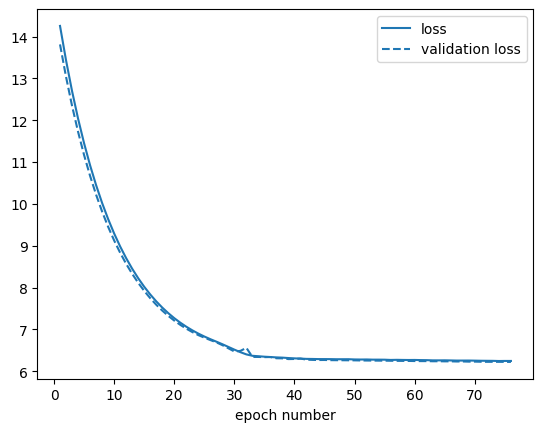

In [4]:
import matplotlib.pyplot as plt
import json

with open('fs/history.json') as f:
    h = json.load(f)

l, = plt.plot(range(1, h['epochs']+1), h['loss'], label='loss')
plt.plot(range(1, h['epochs']+1), h['val_loss'], color=l.get_color(), linestyle='--', label='validation loss')
plt.legend()
plt.xlabel('epoch number');

print(f'Final validation loss: {h["val_loss"][-1]}')
print(f'Final validation accuracy: {h["val_accuracy"][-1]}')
print(f'Final validation F1-score: {h["val_f1_score"][-1]}')

The loss does drop as expected over the first 30 epochs, at which point the validation loss raises and drops back down. Beyond this point, the ds_model architecture cannot seem to learn under same constrained conditions of the smaller model in this repository.